# **Analisis Popularitas Drama Korea Berdasarkan Rank, Popularitas, *Screen Writer*, dan Sutradara (2015–2023)**
---
**Nama:** Noor Hamsyah Pratama  
**NIM:** 2509116046  
**Kelas:** B'2025  


# **Import Library**
----

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# **Memuat Dataset**
---

In [26]:
path = '/content/drive/MyDrive/Colab Notebooks/V1_GlobalSuperStore2016.csv'

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
path = '/content/drive/MyDrive/Colab Notebooks/korean_drama.csv'

df = pd.read_csv(path)
df

,kdrama_id,drama_name,year,director,screenwriter,country,type,tot_eps,duration,start_dt,end_dt,aired_on,org_net,content_rt,synopsis,rank,pop
0,661d4193916c4e71a2c70473ab11e9e8,Sing My Crush,2023,['So Joon Moon'],NaN,South Korea,Drama,8,1500.0,"Aug 2, 2023","Aug 2, 2023",Wednesday,NaN,Not Yet Rated,Follow the story of acquaintances Ba Ram and H...,1484,2238
1,5ffcbeaa17114714af1959129984274c,D.P. Season 2,2023,NaN,['Kim Bo Tong'],South Korea,Drama,6,3000.0,"Jul 28, 2023","Jul 28, 2023",Friday,Netflix,15+ - Teens 15 or older,This unfolding story ensues when military dese...,164,1084
2,65075cb9c1a54be4a441cee6f16c9fdf,Shadow Detective Season 2,2023,['Han Dong Hwa'],"['Song Jung Woo', 'Hwang Seol Hun']",South Korea,Drama,8,3300.0,2023-07-05,2023-07-26,Wednesday,Disney+ Hulu,15+ - Teens 15 or older,Unfolds the ultimate counterattack of veteran ...,2443,6915
3,df0f0ac4b3ff4b15afa26f5a7a53a328,To Be Honest,2023,NaN,NaN,South Korea,Drama,3,600.0,2023-06-30,2023-07-14,Friday,NaN,Not Yet Rated,Don't you have those days where the whole univ...,49895,99999
4,04c1fe41948e464fb440001831d74d41,Celebrity,2023,['Kim Chul Gyu'],['Kim Yi Young'],South Korea,Drama,12,2700.0,"Jun 30, 2023","Jun 30, 2023",Friday,Netflix,18+ Restricted (violence & profanity),Fame. Money. Power. One young woman fights to ...,826,547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1747,e8c09f0f7d0d4b75a4642eb06d76d811,"Kill Me, Heal Me",2015,"['Kim Jin Man', 'Kim Dae Jin']",['Jin Soo Wan'],South Korea,Drama,20,3720.0,2015-01-07,2015-03-12,"Wednesday, Thursday",MBC,15+ - Teens 15 or older,A traumatic childhood experience leaves Cha Do...,232,29
1748,1e7f7f2fa45d4240b8bb585ca13040f0,Enchanting Neighbor,2015,['Park Kyung Ryul'],['Park Hye Ryun'],South Korea,Drama,120,2100.0,2015-01-05,2015-06-22,"Monday, Tuesday, Wednesday, Thursday, Friday",SBS,15+ - Teens 15 or older,"Gong Soo Rae only love her husband, Seo Bong G...",47882,10759
1749,142a09741fdd4daa878d6ae007201e43,Iron Lady Cha,2015,"['Jang Joon Ho', 'Oh Hyun Chang']",['Seol Kyung Eun'],South Korea,Drama,111,2400.0,2015-01-05,2015-06-12,"Monday, Tuesday, Wednesday, Thursday, Friday",MBC,15+ - Teens 15 or older,People born as a member of the baby boomer gen...,58155,14841
1750,9170c31a02014b56bb4cec2105086f00,The Family Is Coming,2015,['Joo Dong Min'],['Kim Shin Hye'],South Korea,Drama,20,3600.0,2015-01-03,2015-03-15,"Saturday, Sunday",SBS,15+ - Teens 15 or older,A grandma has abandoned her family 50 years ag...,7995,4289


# **Business Understanding**
---


## V **Business Objective** V

Industri Drama Korea berkembang pesat dengan banyaknya judul yang dirilis setiap tahun, sehingga persaingan semakin tinggi. Untuk menentukan drama yang populer dan layak diprioritaskan, diperlukan analisis data, bukan hanya tren sesaat. Dengan dataset ini menyediakan informasi judul drama, tahun rilis, dan sutradara, serta indikator popularitas berupa peringkat dan nilai popularitas. Data tersebut dapat digunakan untuk memahami tingkat popularitas drama secara objektif.  
  

Tujuan bisnis dari analisis ini adalah untuk:
1. Memahami faktor-faktor yang memengaruhi popularitas Drama Korea berdasarkan data.
2. Mengidentifikasi drama yang memiliki tingkat popularitas tinggi.
3. Mendukung pengambilan keputusan bisnis dalam rekomendasi dan promosi konten.

## V **Assess Situation** V

Analisis ini memiliki beberapa tantangan, yaitu belum adanya analisis terstruktur untuk mengidentifikasi popularitas Drama Korea berdasarkan data yang tersedia, serta kesulitan dalam menentukan sutradara yang paling dominan sehingga pengambilan keputusan terkait prioritas dan promosi konten masih cenderung subjektif. Namun demikian, tersedia peluang dari dataset ini yang memuat informasi judul, tahun rilis, sutradara, serta juga indikator popularitas dengan peringkat dan nilai popularitas sehingga memungkinkan dilakukan analisis pola popularitas secara tidak langsung dan berbasis data. Di sisi lain, analisis ini juga memiliki keterbatasan, karena popularitas tidak dapat diukur secara langsung serta tidak mencakup faktor eksternal seperti tren global, media sosial, dan strategi pemasaran, sehingga interpretasi hasil sangat bergantung pada asumsi dan pendekatan analisis yang digunakan.

## V **Analytic Goals** V
Tujuan analitik dari analisis ini adalah:  

1. Menganalisis tingkat popularitas Drama Korea berdasarkan nilai peringkat dan popularitas.
2. Mengidentifikasi sutradara yang paling banyak terlibat dalam produksi dengan nilai rank dan pop yang tinggi sebagai indikator popularitas sutradara.
3. Menganalisis konsistensi kemunculan sutradara dari tahun ke tahun pada drama populer untuk melihat pola popularitas yang berkelanjutan.
4. Mengidentifikasi pola kolaborasi *screen writer* dan sutradara pada drama dengan tingkat popularitas tinggi.



## V **Project Plan** V

1. Mengumpulkan dan memilih data menggunakan dataset ini yang memuat informasi *screen writer*, sutradara, dan tahun rilis, serta nilai rank dan pop.
2. Melakukan pengolahan data melalui proses pembersihan, pengelompokan, dan transformasi untuk mendukung analisis.
3. Menganalisis hubungan antara *screen writer*, sutradara, dan indikator popularitas (rank dan pop).
4. Menyimpulkan hasil analisis untuk memberikan gambaran pola popularitas Drama Korea.

# **Data Understanding**
---

## V **Deskripsi Data** V

###  **Struktur Data (Informasi Lanjutan)**

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1752 entries, 0 to 1751
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   kdrama_id     1752 non-null   object 
 1   drama_name    1752 non-null   object 
 2   year          1752 non-null   int64  
 3   director      1036 non-null   object 
 4   screenwriter  959 non-null    object 
 5   country       1752 non-null   object 
 6   type          1752 non-null   object 
 7   tot_eps       1752 non-null   int64  
 8   duration      1728 non-null   float64
 9   start_dt      1752 non-null   object 
 10  end_dt        1752 non-null   object 
 11  aired_on      1520 non-null   object 
 12  org_net       1344 non-null   object 
 13  content_rt    1752 non-null   object 
 14  synopsis      1584 non-null   object 
 15  rank          1752 non-null   int64  
 16  pop           1752 non-null   int64  
dtypes: float64(1), int64(4), object(12)
memory usage: 232.8+ KB


Berdasarkan data di atas, dapat diketahui bahwa dataset ini memiliki 1752 Baris dan 17 Kolom.   

---
1. 'kdrama_id'  
    * Jumlah baris : 1752
    * Tipe Data : object
    * Deskripsi : ID unik untuk setiap drama  

2. 'drama_name'  
    * Jumlah baris : 1752
    * Tipe Data : object
    * Deskripsi : Judul drama

3. 'year'  
    * Jumlah baris : 1752
    * Tipe Data : int64
    * Deskripsi : Tahun rilis drama  

4. 'director'  
    * Jumlah baris : 1036
    * Tipe Data : object
    * Deskripsi : Nama sutradara

5. 'screenwriter'  
    * Jumlah baris : 959
    * Tipe Data : object
    * Deskripsi : Nama penulis skenario

6. 'country'  
    * Jumlah baris : 1752
    * Tipe Data : object
    * Deskripsi : Negara asal produksi drama

7. 'type'  
    * Jumlah baris : 1752
    * Tipe Data : object
    * Deskripsi : Jenis drama


8. 'tot_eps'  
    * Jumlah baris : 1752
    * Tipe Data : int64
    * Deskripsi : Total jumlah episode setiap drama

9. 'duration'  
    * Jumlah baris : 1728
    * Tipe Data : float64
    * Deskripsi : Durasi Drama

10. 'start_dt'  
    * Jumlah baris : 1752
    * Tipe Data : object
    * Deskripsi : Tanggal mulai penayangan drama

11. 'end_dt'  
    * Jumlah baris : 1752
    * Tipe Data : object
    * Deskripsi : Tanggal selesai penayangan drama

12. 'aired_on'  
    * Jumlah baris : 1520
    * Tipe Data : object
    * Deskripsi : Hari penayangan drama

13. 'org_net'  
    * Jumlah baris : 1344
    * Tipe Data : object
    * Deskripsi : Jaringan/platform penayangan

14. 'content_rt'  
    * Jumlah baris : 1752
    * Tipe Data : object
    * Deskripsi : Klasifikasi usia atau rating konten

15. 'synopsis'  
    * Jumlah baris : 1584
    * Tipe Data : object
    * Deskripsi : Ringkasan cerita drama

16. 'rank'  
    * Jumlah baris : 1752
    * Tipe Data : int64
    * Deskripsi : Peringkat drama

17. 'pop'  
    * Jumlah baris : 1752
    * Tipe Data : int64
    * Deskripsi : skor atau indeks popularitas drama

### **Statistik Deskriptif**

In [30]:
df.describe(include='all')


,kdrama_id,drama_name,year,director,screenwriter,country,type,tot_eps,duration,start_dt,end_dt,aired_on,org_net,content_rt,synopsis,rank,pop
count,1752,1752,1752.000000,1036,959,1752,1752,1752.000000,1728.000000,1752,1752,1520,1344,1752,1584,1752.000000,1752.000000
unique,1752,1752,NaN,585,596,1,1,NaN,NaN,1307,1334,62,125,6,1584,NaN,NaN
top,c19353bdbc7a43ae98b27db202e7c908,Crow Building,NaN,['Ahn Gil Ho'],['Kim Eun Hee'],South Korea,Drama,NaN,NaN,2015-10-05,2020-01-23,"Monday, Tuesday",Naver TV Cast,15+ - Teens 15 or older,Finding a job in Seoul seems impossible for th...,NaN,NaN
freq,1,1,NaN,9,7,1752,1752,NaN,NaN,5,5,210,209,955,1,NaN,NaN
mean,NaN,NaN,2019.006849,NaN,NaN,NaN,NaN,18.996005,2149.791667,NaN,NaN,NaN,NaN,NaN,NaN,22247.869292,22153.746575
std,NaN,NaN,2.317455,NaN,NaN,NaN,NaN,25.618394,1532.133619,NaN,NaN,NaN,NaN,NaN,NaN,27688.839480,37776.993814
min,NaN,NaN,2015.000000,NaN,NaN,NaN,NaN,1.000000,60.000000,NaN,NaN,NaN,NaN,NaN,NaN,9.000000,1.000000
25%,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN,8.000000,720.000000,NaN,NaN,NaN,NaN,NaN,NaN,2441.500000,915.750000
50%,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN,12.000000,1800.000000,NaN,NaN,NaN,NaN,NaN,NaN,6265.500000,3698.500000
75%,NaN,NaN,2021.000000,NaN,NaN,NaN,NaN,16.000000,3600.000000,NaN,NaN,NaN,NaN,NaN,NaN,49204.500000,12086.250000


1. count                        
Berdasarkan data, total baris adalah 1752. maka dapat disimpulkan bahwa:
* kolom 'director' ada 716 data yang hilang (1752-1036)
* kolom 'screenwriter' ada 793 data yang hilang (1752-959)
* kolom 'duration' ada 24 data yang hilang (1752-1728)
* kolom 'aired_on' ada 232 data yang hilang (1752-1520)
* kolom 'org_net' ada 408 data yang hilang (1752-1344)
* kolom 'synopsis' ada 168 data yang hilang (1752-1584)   

  Dari keterangan diatas dapat dikatakan bahwa kolom 'director', 'screenwriter', 'duration', 'aired_on', 'org_net', dan 'synopsis' terdapat *missing values*, sementara kolom lainnya lengkap (1752 data).
---
2. Mean dan Median(50%)

**'year'**  
* mean = 2019
* median = 2019  
Nilai mean dan median yang sama menunjukkan bahwa data tahun rilis drama terdistribusi relatif simetris. Mayoritas drama korea dalam dataset ini diproduksi sekitar tahun 2019, menandakan fokus data pada era modern drama korea.

**'tot_eps'**  
* mean = 19
* median = 12  
Nilai rata-rata jauh lebih besar dari median, hal ini menandakan adanya drama dengan jumlah episode sangat banyak yang menarik nilai mean ke atas. Mayoritas drama memiliki sekitar 12 episode, namun keberadaan drama panjang (long-running series) menyebabkan distribusi data condong ke kanan (right-skewed).

**'duration'**  
* mean = 2149,79
* median = 1800  
Mean lebih besar dari median, menunjukkan bahwa terdapat beberapa drama dengan total durasi tayang yang sangat panjang. Mayoritas drama memiliki durasi total sekitar 1800 menit, sedangkan nilai ekstrem menyebabkan rata-rata meningkat.

**'rank'**
* mean = 22248
* median = 6266  
Perbedaan yang sangat signifikan antara mean dan median menunjukkan bahwa sebagian besar drama memiliki ranking cukup baik, namun terdapat sejumlah kecil drama dengan ranking sangat buruk (nilai besar) yang menarik rata-rata secara drastis.

**'pop'**
* mean = 22154
* median = 3699  
Nilai mean jauh lebih besar daripada median, menandakan bahwa hanya sedikit drama yang sangat populer, sementara mayoritas drama memiliki tingkat popularitas yang relatif rendah.

---
3. Min dan Max  

**'year'**  
* Min = 2015
* Max = 2023  
Rentang tahun masih logis dan konsisten, mencerminkan periode rilis drama dalam kurun waktu kurang lebih 9 tahun terakhir.

**'tot_eps'**  
* Min = 1
* Max = 150  
Jumlah episode maksimum sebesar 150 episode perlu divalidasi lebih lanjut, karena kemungkinan merupakan drama harian atau serial jangka panjang, bukan format drama korea reguler (mini series).

**'duration'**  
* Min = 60
* Max = 9180  
Rentang durasi yang sangat lebar menunjukkan variasi format drama, mulai dari drama pendek hingga serial dengan total durasi sangat panjang.

**'rank'**  
* Min = 9
* Max = 99999  
Nilai ranking maksimum yang sangat besar menunjukkan adanya drama dengan performa sangat rendah.

**'pop'**  
* Min = 1
* Max = 99999
Rentang popularitas yang ekstrem menunjukkan kesenjangan besar antara drama yang kurang dikenal dan drama yang sangat populer.

---
4. Standar Deviasi (std)  

**'year'**  
* mean = 2019
* std = 2,31  
Standar deviasi yang kecil menunjukkan bahwa tahun rilis drama cukup terkonsentrasi dan tidak menyebar jauh.

**'tot_eps'**
* mean = 19
* std = 25,62  
Nilai standar deviasi yang lebih besar dari mean menunjukkan variasi jumlah episode yang sangat tinggi, menandakan ketidakhomogenan format episode antar drama.

**'duration'**
* mean = 2149,79
* std = 1532,13  
Standar deviasi yang tinggi (kurang lebih 71% dari mean) menunjukkan bahwa total durasi drama sangat bervariasi, dari drama singkat hingga sangat panjang.

**'rank'**
* mean = 22248
* std = 27689  
Nilai standar deviasi yang lebih besar dari mean mengindikasikan ketidakstabilan ranking serta dominasi nilai ekstrem dalam data.

**'pop'**
* mean = 22154
* std = 37777  
Standar deviasi yang jauh lebih besar dari mean menunjukkan bahwa popularitas drama sangat tidak merata, dengan perbedaan tajam antara drama biasa dan drama yang sangat populer.


## V **Verifikasi Kualitas Data** V

### **Cek Tipe Data**

In [31]:
df.dtypes

,0
kdrama_id,object
drama_name,object
year,int64
director,object
screenwriter,object
country,object
type,object
tot_eps,int64
duration,float64
start_dt,object


1. Object  
Kolom yang bertipe object antara lain:
* 'kdrama_id'  
* 'drama_name'
* 'director'
* 'screenwriter'
* 'country'
* 'type'
* 'start_dt'
* 'end_dt'
* 'aired_on'
* 'org_net'
* 'content_rt'
* 'synopsis'  

Kolom bertipe object menunjukkan bahwa data bersifat kategorikal atau teks, seperti identitas dan nama drama, informasi kreator (sutradara, penulis), negara asal, jenis drama, informasi tanggal tayang yang masih disimpan sebagai string, deskripsi singkat (sinopsis).

---
2. Integer  
Kolom yang bertipe int64 antara lain:
* 'year'
* 'tot_eps'
* 'rank'
* 'pop'  

Kolom bertipe int64 menunjukkan data numerik diskrit (bilangan bulat), yang digunakan untuk menunjukkan tahun rilis, jumlah episode, peringkat, dan tingkat popularitas drama.

---
3. Float  
Kolom yang bertipe float64 antara lain:
* 'duration'  

Tipe float64 menunjukkan bahwa kolom ini berisi data numerik kontinu, yaitu total durasi tayang drama (dalam menit).



### **Cek Incosistent Values**

In [32]:
print(df['kdrama_id'].unique())

['661d4193916c4e71a2c70473ab11e9e8' '5ffcbeaa17114714af1959129984274c'
 '65075cb9c1a54be4a441cee6f16c9fdf' ... '142a09741fdd4daa878d6ae007201e43'
 '9170c31a02014b56bb4cec2105086f00' 'c19353bdbc7a43ae98b27db202e7c908']


Pada kolom 'kdrama_id' ini, tidak ditemukan adanya *incosisten values*. karena data yang ada di kolom 'kdrama_id' bersifat unik.

In [33]:
print(df['drama_name'].unique())

['Sing My Crush' 'D.P. Season 2' 'Shadow Detective Season 2' ...
 'Iron Lady Cha' 'The Family Is Coming' 'Crow Building']


Pada kolom 'drama_nama' ini, tidak ditemukan adanya *incosistent_value*.

In [34]:
print(df['director'].unique())

["['So Joon Moon']" nan "['Han Dong Hwa']" "['Kim Chul Gyu']"
 "['Kim Chil Bong']" "['Lee Jung Rim', 'Kim Jae Hong']" "['Jung Ji Hyun']"
 "['Im Hyun Wook', 'Choi Sun Min']" "['Lee Na Jung']" "['Yang Kyung Hee']"
 "['Kang Hee Ju']" "['Kim Yoon Cheol']" "['Lee Soo Hyun']"
 "['Lee Jong Pil']" "['Park Sun Jae', 'Kim Hoon Gwang']"
 "['Kim Eun Kyung', 'Oh Hwan Min']" "['Lee Dong Yoon']"
 "['Park Joon Sik']" "['Kang Shin Hyo', 'Jo Nam Hyung']"
 "['Kim Jin Sung']" "['Kang Soo Yeon', 'Lee Woong Hee']" "['Yoo In Shik']"
 "['Min Chae Yeon']" "['Shim Na Yeon']" "['Kang Ho Jun']"
 "['Sung Yong Il']" "['Ryu Kwang Hyun']"
 "['Jang Jung Do', 'Lee Jung Mook']" "['Kim Dae Jin', 'Kim Jung Wook']"
 "['Oh Jin Suk']" "['Choi Joon Bae', 'Min Jung Ah']"
 "['Seo Min Jung', 'Lee Tae Gon']" "['Yoo Jong Sun', 'Kim Seung Woo']"
 "['Kim Hong Seon']" "['Lee Han Joon', 'Kim Seung Ho']" "['Kim Jung Min']"
 "['Jang Eui Soon']" "['Shin Chang Seok']" "['Choi Young Hoon']"
 "['Ahn Gil Ho']" "['Lim Hyun Hee']" "['Han Hee',

Pada kolom 'director' ini dapat dilihat terdapat *incosistent values* pada nama "Hwang  Gyung Sung" ada *double space*.

In [35]:
print(df['screenwriter'].unique())

[nan "['Kim Bo Tong']" "['Song Jung Woo', 'Hwang Seol Hun']"
 "['Kim Yi Young']" "['Oh Hye Seok', 'Jung An']" "['Kim Eun Hee']"
 "['Ji Ah Nee']" "['Choi Rom']" "['Han Ah Reum', 'Choi Young Rim']"
 "['Joo Young Ha']" "['Han Woo Joo']" "['Son Mi']" "['Jung Hyun Woo']"
 "['Jeon Seon Young']" "['Kim Roo Ri']" "['Han Woo Ri']" "['Kang Yoon']"
 "['Baek So Yeon']" "['Kang Eun Kyung']" "['Seok Bo Bae']"
 "['Bae Se Young']" "['Im Do Wan']" "['Lee Nam Gyu']" "['Jung Yoo Sun']"
 "['Jung Yeo Rang']" "['Moon Ji Young']" "['Shin Kyung Il']"
 "['Ah Kyung']" "['No Yoon Soo']" "['Kim Jin Wook']"
 "['Choi Jin Young', 'Jung Ho Rak']" "['Kwon Eum Mi']" "['Kang Jae Hyun']"
 "['Lee Jung Dae']" "['Hyun Ji Min']" "['Kim Eun Sook']"
 "['Lee Yun Seul']" "['Jung Hyung Soo']" "['Yoo Young Ah']"
 "['Kim Hoi Joon']" "['Park Hye Young', 'Han Bo Kyung', 'Joo Hyo Jin']"
 "['Jang Yoon Mi']" "['Kim Ga Eun']" "['Oh Sang Ho']" "['Lee Chun Geum']"
 "['Choi Soo Young', 'Choi Soo Young']" "['Jung Hyun Jung']"
 "['Heo Joon Wo

Pada kolom 'screenwriter' ini dapat dilihat terdapat *incosistent values* pada nama "Shin So  Young" ada *double space*.

In [36]:
print(df['country'].unique())

['South Korea']


Pada kolom 'country' ini, tidak ditemukan adanya *incosistent value*. Karena hanya mempunyai satu data.

In [37]:
print(df['type'].unique())

['Drama']


Pada kolom 'type' ini, tidak ditemukan adanya *incosistent_value*. Karena hanya mempunyai satu data.

In [38]:
print(df['start_dt'].unique())

['Aug  2, 2023' 'Jul 28, 2023' '2023-07-05' ... '2015-01-05' '2015-01-03'
 '2015']


Pada kolom 'start_dt' ini dapat dilihat terdapat *incosistent values* dengan formatnya, semuanya memiliki format yang berbeda. Maka hal ini kita bisa tangani dengan menyamakan formatnya menjadi yyyy-mm-dd

In [39]:
print(df['end_dt'].unique())

['Aug  2, 2023' 'Jul 28, 2023' '2023-07-26' ... '2015-06-12' '2015-03-15'
 '2015']


Pada kolom 'end_dt' ini dapat dilihat terdapat *incosistent values* dengan formatnya, semuanya memiliki format yang berbeda. Maka hal ini kita bisa tangani dengan menyamakan formatnya menjadi yyyy-mm-dd

In [40]:
print(df['aired_on'].unique())

['Wednesday' 'Friday' 'Friday, Saturday' 'Monday' 'Monday, Tuesday'
 'Saturday, Sunday' 'Saturday' 'Wednesday, Thursday' 'Thursday'
 'Thursday, Friday' nan 'Tuesday, Wednesday'
 'Monday, Tuesday, Wednesday, Thursday, Friday' 'Monday, Wednesday'
 'Wednesday, Friday' 'Friday, Saturday, Sunday' 'Tuesday'
 'Wednesday, Sunday' 'Tuesday, Thursday' 'Thursday, Sunday'
 'Thursday, Friday, Saturday, Sunday' 'Monday, Tuesday, Wednesday'
 'Friday, Sunday' 'Sunday' 'Tuesday, Friday'
 'Monday, Tuesday, Wednesday, Friday, Saturday, Sunday'
 'Monday, Wednesday, Friday' 'Tuesday, Saturday' 'Wednesday, Saturday'
 'Monday, Thursday' 'Monday, Sunday' 'Monday, Thursday, Friday'
 'Monday, Thursday, Saturday'
 'Monday, Tuesday, Wednesday, Thursday, Sunday' 'Thursday, Saturday'
 'Tuesday, Wednesday, Thursday' 'Tuesday, Wednesday, Friday'
 'Sunday, Saturday' 'Tuesday, Saturday, Sunday'
 'Monday, Thursday, Wednesday, Tuesday' 'Sunday, Tuesday, Thursday'
 'Thursday, Wednesday' 'Friday, Wednesday' 'Wednesday, Mon

Pada kolom 'aired_on' ini, tidak ditemukan adanya *incosistent value*.

In [41]:
print(df['org_net'].unique())

[nan 'Netflix' 'Disney+ Hulu' 'Naver TV Cast' 'MBC' 'SBS' 'ENA Genie TV'
 'jTBC Netflix TVING' 'Netflix TVING tvN' 'MBC Dramanet' 'TVING'
 'Amazon Prime ENA TVING' 'tvN' 'KBS1' 'KBS2 ViuTV' 'Channel A'
 'TVING tvN' 'jTBC Netflix' 'ENA TVING' 'SBS ViuTV' 'KBS2'
 'Hulu TVING tvN' 'KBS2 Viki' 'ENA Genie TV ViuTV' 'Amazon Prime TVING'
 'ENA Genie TV Viki' 'Netflix tvN' 'jTBC' 'Amazon Prime SBS' 'Netflix SBS'
 'TV Chosun' 'iQiyi' 'ENA' 'OBS' 'Viki' 'jTBC ViuTV'
 'DRAMAcube ENA SBS SBS Plus' 'vLive' 'EBS' 'Amazon Prime MBC' 'ENA Viki'
 'tvN Viki' 'KBS2 Viki ViuTV' 'Daum Kakao TV' 'Amazon Prime jTBC'
 'ENA jTBC' 'SBS Viki ViuTV' 'Hulu MBC' 'Naver TV Cast Viki vLive'
 'ENA Netflix' 'KBS2 Netflix' 'Daum Kakao TV Netflix' 'MBC ViuTV'
 'Naver TV Cast vLive' 'MBC Netflix' 'Disney+' 'OCN' 'MBN Viki'
 'DRAMAcube' 'LINE TV Viki' 'iQiyi Viki' 'iQiyi tvN' 'TV Chosun Viki'
 'Naver TV Cast TVING' 'Genie TV' 'Channel A Viki' 'ViuTV'
 'Daum Kakao TV Viki' 'MBC Viki' 'iQiyi jTBC' 'iQiyi SBS'
 'Daum Kakao TV

Pada kolom 'org_net' ini, tidak ditemukan adanya *incosistent value*. Karena penulisan kapital dan kapitil sudah sesuai dengan namanya masing-masing.

In [42]:
print(df['content_rt'].unique())

['Not Yet Rated' '15+ - Teens 15 or older'
 '18+ Restricted (violence & profanity)' '13+ - Teens 13 or older'
 'G - All Ages' 'R - Restricted Screening (nudity & violence)']


Pada kolom 'content_rt' ini, tidak ditemukan adanya *incosistent values*.

In [43]:
print(df['synopsis'].unique())

['Follow the story of acquaintances Ba Ram and Han Tae after an incident occurred during their school years. Now that they are adults, will Ba Ram be able to suppress the feelings for Han Tae that he has harbored for so long?(Source: BLUPDATE2022 Twitter)~~ Adapted from the webtoon "Ttarabaram" (따라바람) by Geom Dung (검둥). '
 'This unfolding story ensues when military desertion arrest squad members (DP), Jun Ho and Ho Yeol, run across absurdities and unchangeable reality on a regular basis.(Source: Namuwiki; Edited by Krystale Mitaesa at MyDramaList)~~ Adapted from the webtoon "D.P Dog Day" (D.P 개의 날) by Kim Bo Tong (김보통). '
 "Unfolds the ultimate counterattack of veteran homicide detective Kim Taek Rok, who has returned to investigate the secret mastermind behind the blackmailer 'Friend'.(Source: Sports Chosun; edited by Krystale Mitaesa at MyDramaList) "
 ...
 "People born as a member of the baby boomer generation have elderly parents to support while also sacrificing themselves to supp

Pada kolom 'synopsis' ini, tidak ditemukan adanya *incosistent values*.

### **Cek Missing Values**

In [44]:
pd.DataFrame(df.isna().sum() / len(df) * 100, columns=['Null Ratio in %'])

,Null Ratio in %
kdrama_id,0.000000
drama_name,0.000000
year,0.000000
director,40.867580
screenwriter,45.262557
country,0.000000
type,0.000000
tot_eps,0.000000
duration,1.369863
start_dt,0.000000


Kolom-kolom yang membutuhkan perhatian lebih karena memiliki *missing values* adalah:
* 'screenwriter' = 45,26%
* 'director' = 40,87%
* 'duration' = 1,37%
* 'org_net' = 23,29%
* 'aired_on' = 13,24%
* 'synopsis' = 9,59%  

---
Kolom-kolom yang tidak memiliki masalah *missing values* (0%) antara lain:
* 'kdrama_id'
* 'drama_name'
* 'year'
* 'country'
* 'type'
* 'tot_eps'
* 'start_dt'
* 'end_dt'
* 'content_rt'
* 'rank'
* 'pop'

Kolom-kolom tersebut lengkap sepenuhnya dan sangat andal untuk digunakan dalam analisis statistik dan visualisasi.

### **Cek Duplicated Values**

In [45]:
df[df.duplicated()]

,kdrama_id,drama_name,year,director,screenwriter,country,type,tot_eps,duration,start_dt,end_dt,aired_on,org_net,content_rt,synopsis,rank,pop


Dapat dilihat bahwa dataset ini tidak memiliki *duplicated values*, maka tidak ada yang perlu ditangani. Ini menunjukkan kualitas data yang baik dalam hal tidak adanya duplikasi.

### **Cek Outliers Values**

In [46]:
results = []
cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
year,0.000000
tot_eps,13.641553
duration,0.057078
rank,0.000000
pop,18.892694


Kolom 'pop' menunjukkan persentase outlier tertinggi, sekitar 18,89%, yang menandakan adanya sejumlah nilai popularitas yang sangat berbeda dibandingkan dengan mayoritas data. Hal ini bisa menunjukkan adanya beberapa judul yang memiliki tingkat popularitas sangat tinggi (atau sangat rendah) sehingga perlu diselidiki lebih lanjut apakah nilai tersebut valid atau merupakan anomali.

---

Kolom 'tot_eps' juga menunjukkan persentase outliers yang cukup signifikan, yaitu sekitar 13,64%. Hal ini mengindikasikan adanya beberapa drama dengan jumlah episode yang jauh lebih banyak atau lebih sedikit daripada pola umum dataset. Diperlukan pengecekan untuk memastikan apakah ini merupakan format khusus (seperti drama panjang atau mini series) atau karena data yang tidak konsisten.

---

Kolom 'duration' memiliki persentase outlier yang sangat kecil, hanya sekitar 0,06%, sehingga secara umum, durasi episode cenderung konsisten dan stabil. Outlier yang ada kemungkinan hanya merupakan kasus-kasus yang bersifat khusus.

---

Sementara, kolom 'year' dan 'rank' tidak memiliki outliers (0%), yang menunjukkan distribusi data pada kedua kolom ini cukup terkontrol dan tidak terdapat nilai yang menyimpang secara ekstrem.

## V **Exploratory Data Analysis** V

### **Comparison/Perbandingan**

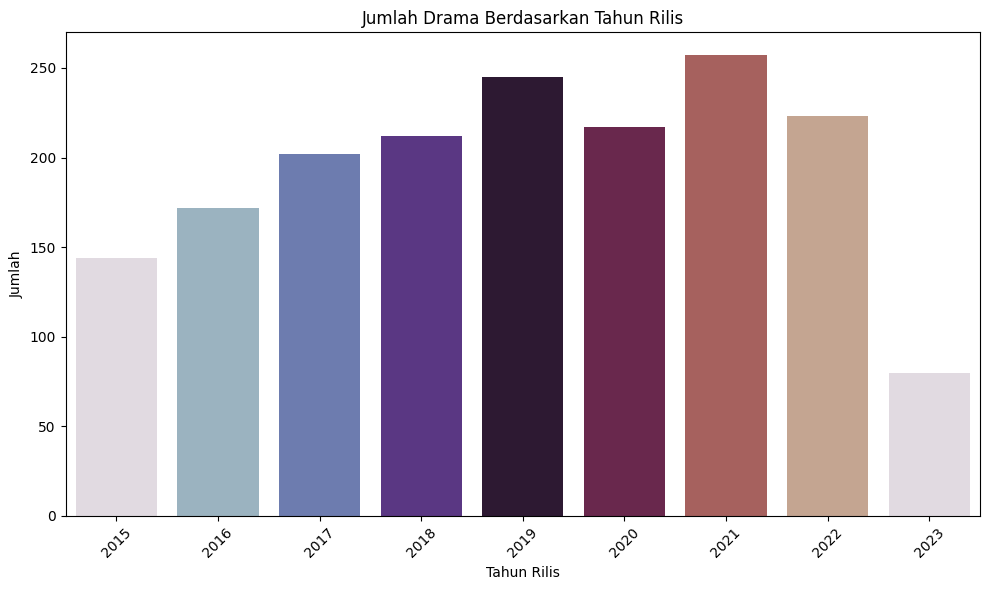

In [63]:
tahun_drama = df['year'].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=tahun_drama.index,y=tahun_drama.values,hue=tahun_drama.index,palette='twilight',legend=False)
plt.title('Jumlah Drama Berdasarkan Tahun Rilis')
plt.xlabel('Tahun Rilis')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Berdasarkan visualisasi di atas, terdapat pola peningkatan produksi yang stabil dari tahun 2015 hingga mencapai puncaknya pada tahun 2019. Pada tahun 2020, terlihat sedikit penurunan dalam jumlah produksi, yang mungkin dipicu oleh faktor eksternal seperti gangguan dalam proses produksi(pandemi). Selanjutnya, industri menunjukkan pemulihan yang signifikan dengan lonjakan produksi pada tahun 2021, yang menjadi titik tertinggi dalam periode tersebut. Namun, dari tahun 2022 hingga 2023, kembali muncul tren penurunan, di mana tahun 2023 mencatat angka terendah dalam beberapa tahun terakhir, yang mungkin disebabkan oleh data yang belum sepenuhnya tersedia atau adanya penurunan produksi yang nyata.

### **Composition/Komposisi**

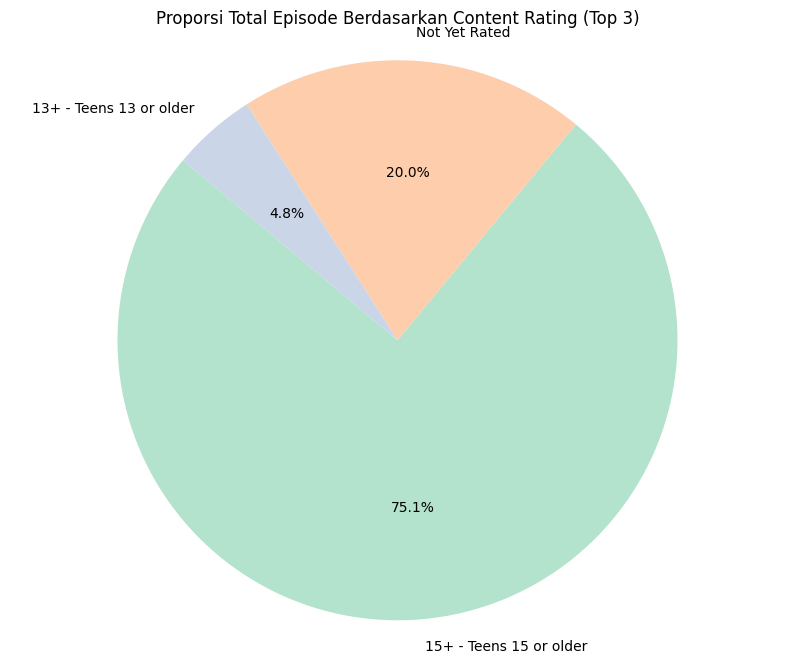

In [70]:
rate_eps = df.groupby('content_rt')['tot_eps'].sum().sort_values(ascending=False)
rate_eps_top3 = rate_eps.head(3)

plt.figure(figsize=(10, 8))
rate_eps_top3.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.Pastel2.colors)
plt.title('Proporsi Total Episode Berdasarkan Content Rating (Top 3)')
plt.ylabel('')
plt.axis('equal')
plt.show()

Berdasarkan visualisasi tersebut, kategori 15+ (Teens 15 or older) mendominasi total episode dengan proporsi sekitar 75,1%, menunjukkan bahwa mayoritas produksi drama ditujukan untuk remaja ke atas sebagai target pasar utama. Sementara itu, kategori Not Yet Rated menyumbang sekitar 20%, dan kategori 13+ hanya sekitar 4,8%, sehingga kontribusinya relatif kecil dibandingkan kategori 15+. Hal ini mengindikasikan bahwa industri drama lebih banyak memproduksi konten dengan segmentasi usia 15 tahun ke atas dibandingkan rating lainnya.

### **Distribution/Distribusi**

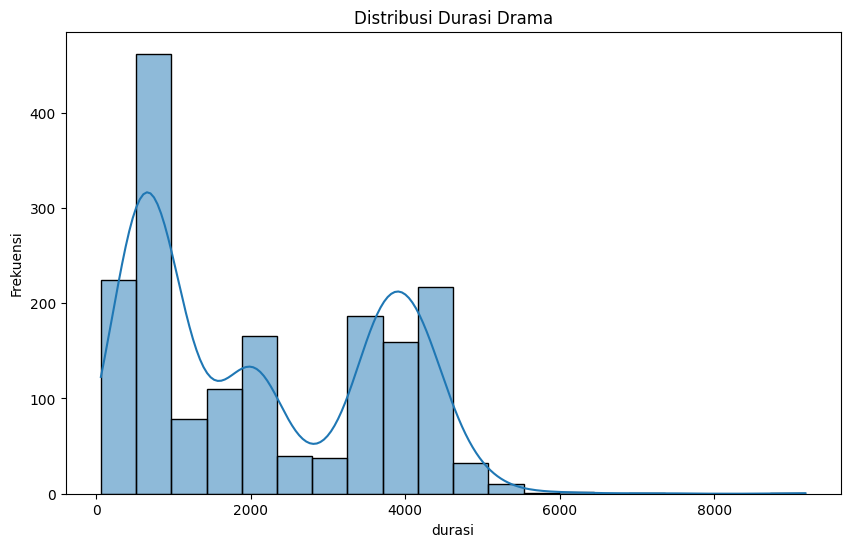

In [79]:
plt.figure(figsize=(10, 6))
sns.histplot(df['duration'], bins=20, kde=True)
plt.title('Distribusi Durasi Drama')
plt.xlabel('durasi')
plt.ylabel('Frekuensi')
plt.show()

Berdasarkan histogram distribusi durasi drama, terlihat bahwa mayoritas drama memiliki durasi yang terkonsentrasi pada rentang tertentu, namun distribusinya tidak simetris dan cenderung right-skewed. Hal ini ditunjukkan dengan adanya beberapa drama berdurasi sangat panjang yang membentuk ekor panjang di sisi kanan grafik. Distribusi juga menunjukkan adanya variasi durasi yang cukup beragam antar drama.

### **Relationship/Hubungan**

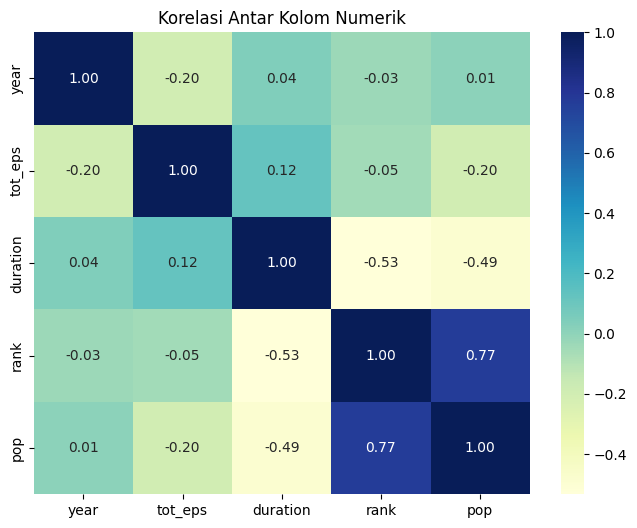

In [98]:
plt.figure(figsize=(8, 6))
sns.heatmap(data=df[['year', 'tot_eps', 'duration', 'rank', 'pop']].corr(),
            annot=True,
            cmap='YlGnBu',
            fmt='.2f')
plt.title('Korelasi Antar Kolom Numerik')
plt.show()

Berdasarkan heatmap, terlihat bahwa hubungan paling kuat terdapat antara rank dan pop dengan korelasi positif sebesar 0.77, yang menunjukkan adanya hubungan yang sangat kuat antara peringkat dan tingkat popularitas. Selain itu, terdapat korelasi negatif cukup kuat antara duration dan rank (-0.53) serta duration dan pop (-0.49), yang mengindikasikan bahwa durasi yang lebih panjang cenderung berkaitan dengan perubahan pada peringkat dan popularitas.

Sementara itu, variabel lain seperti year, tot_eps, dan kombinasi antar keduanya menunjukkan korelasi yang relatif lemah (mendekati 0), sehingga tidak terdapat hubungan linear yang signifikan antar variabel tersebut. Secara keseluruhan, variabel yang paling berpengaruh dalam hubungan numerik pada dataset ini adalah rank, pop, dan duration, sedangkan tahun rilis dan total episode tidak menunjukkan hubungan yang kuat dengan variabel lainnya.